Sanity Check
--

Fit some approximations to a model with a *Gaussian* likelihood. Make sure they're all the same. 

In [5]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

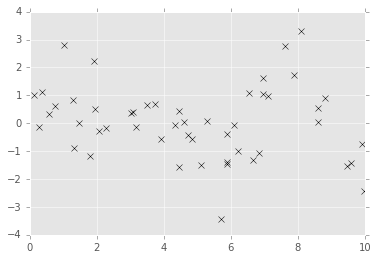

In [6]:
X = np.random.rand(50,1)*10
Y = np.sin(X) + 0.9 * np.cos(X*1.6) + np.random.randn(*X.shape)* 0.8
plt.plot(X, Y, 'kx')

In [7]:
m1 = GPflow.gpr.GPR(X, Y, kern=GPflow.kernels.RBF(1))
m2 = GPflow.vgp.VGP(X, Y, GPflow.kernels.RBF(1), likelihood=GPflow.likelihoods.Gaussian())
m3 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), likelihood=GPflow.likelihoods.Gaussian(), Z=X.copy(), q_diag=False)
m3.Z.fixed = True
m4 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), likelihood=GPflow.likelihoods.Gaussian(), Z=X.copy(), q_diag=False, whiten=True)
m4.Z.fixed=True
m5 = GPflow.sgpr.SGPR(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), Z=X.copy())
m5.Z.fixed = True

In [8]:
m5.optimize()
m1.optimize()
m2.optimize()
m3.optimize()
m4.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state


      fun: 77.398602804778989
 hess_inv: <2554x2554 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.13383217e-04,   2.08930689e-03,   6.81831768e-05, ...,
        -1.28954238e-06,   9.67186480e-06,   3.10314373e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 154
      nit: 144
   status: 0
  success: True
        x: array([  4.29391715e-01,   5.25946731e-01,   7.09936725e-01, ...,
         2.79732651e-04,  -2.24124725e-04,  -7.27292425e-04])

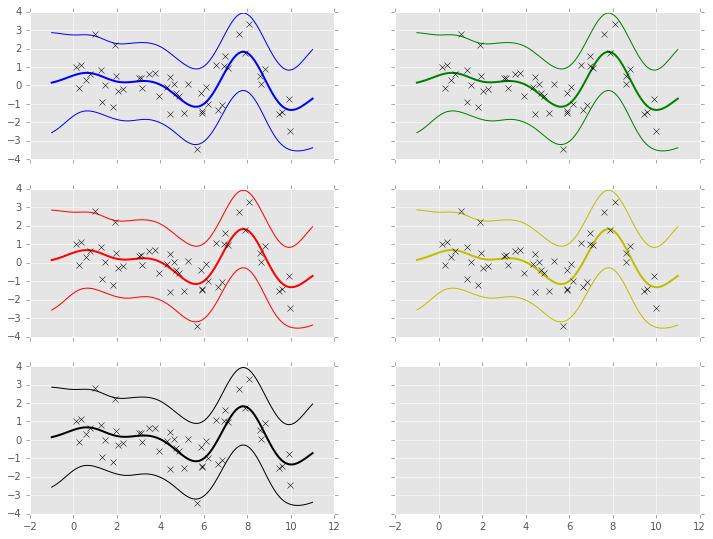

In [9]:
xx = np.linspace(-1, 11, 100)[:,None]


def plot(m, color, ax):
    mu, var = m.predict_y(xx)
    ax.plot(xx, mu, color, lw=2)
    ax.plot(xx, mu+ 2*np.sqrt(var), color, xx, mu-2*np.sqrt(var), color, lw=1)
    ax.plot(X, Y, 'kx')

f, ax = plt.subplots(3,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'b', ax[0,0])
plot(m2, 'r', ax[1,0])
plot(m3, 'g', ax[0,1])
plot(m4, 'y', ax[1,1])
plot(m5, 'k', ax[2,0])

In [10]:
m1.kern

Name,values,prior,constriant
kern.lengthscales,[ 0.99011414],None,+ve
kern.variance,[ 1.10929375],None,+ve


In [11]:
m2.kern

Name,values,prior,constriant
kern.lengthscales,[ 0.99085713],None,+ve
kern.variance,[ 1.10971434],None,+ve


In [12]:
m3.kern

Name,values,prior,constriant
kern.white.variance,[ 8.33964067e-08],None,+ve
kern.rbf.lengthscales,[ 0.98992298],None,+ve
kern.rbf.variance,[ 1.10882677],None,+ve


In [13]:
m4.kern

Name,values,prior,constriant
kern.rbf.lengthscales,[ 0.99030671],None,+ve
kern.rbf.variance,[ 1.10983658],None,+ve
kern.white.variance,[ 1.44358716e-07],None,+ve


In [14]:
m5.kern

Name,values,prior,constriant
kern.rbf.lengthscales,[ 0.99025202],None,+ve
kern.rbf.variance,[ 1.10945442],None,+ve
kern.white.variance,[ 1.70342532e-06],None,+ve


In [15]:
print -m1._objective(m1.get_free_state())[0]
print -m2._objective(m2.get_free_state())[0]
print -m3._objective(m3.get_free_state())[0]
print -m4._objective(m4.get_free_state())[0]
print -m5._objective(m5.get_free_state())[0]

-77.3985882658
[-77.39911946]
-77.3986001463
-77.3986028048
[-77.39865636]
